In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
import scipy.integrate
import astropy.units as u
import GCRCatalogs
import pandas as pd

%matplotlib inline

try:
  import gi
  gi.require_version('NumCosmo', '1.0')
  gi.require_version('NumCosmoMath', '1.0')
except:
  pass

import sys
import math
import matplotlib.pyplot as plt
from gi.repository import GObject
from gi.repository import NumCosmo as Nc
from gi.repository import NumCosmoMath as Ncm

Ncm.cfg_init ()
Ncm.cfg_set_log_handler (lambda msg: sys.stdout.write (msg) and sys.stdout.flush ())

catalog = 'skysim5000_v1.1.1_image'
skysim_cat = GCRCatalogs.load_catalog(catalog)
cosmo_ss  = skysim_cat.cosmology



from astropy.io import fits
from astropy.table import Table


In [2]:
def add_mcat(c, mcat, name):
    nwalkers = mcat.nchains ()
    m2lnL = mcat.get_m2lnp_var ()

    # Use nwalkers * 10 as burning length
    burn = nwalkers * burnin
    rows = np.array ([mcat.peek_row (i).dup_array () for i in range (burn, mcat.len ())])
    params = ["$" + mcat.col_symb (i) + "$" for i in range (mcat.ncols ())]

    posterior = -0.5 * rows[:,m2lnL]

    rows   = np.delete (rows,   m2lnL, 1)
    params = np.delete (params, m2lnL, 0)

    indices = [0,1]

    rows   = rows[:,indices]
    params = params[indices]

    c.add_chain(rows, posterior = posterior, parameters=list(params), name=name)

[0.258856, -1]


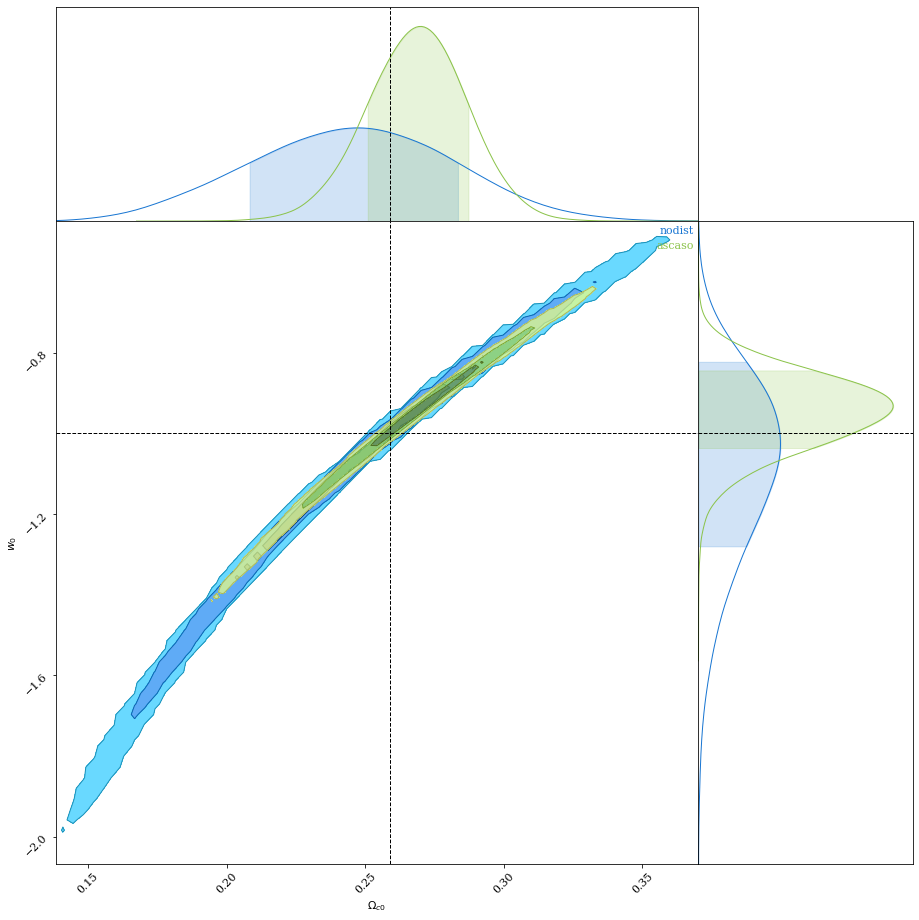

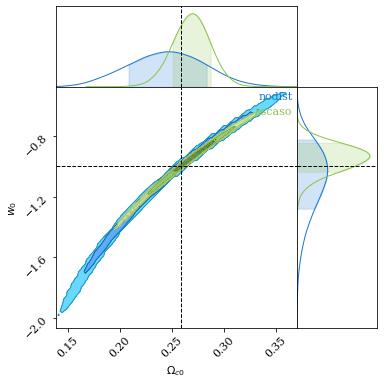

In [3]:
nwalkers = 300
burnin   = 10
mcat_nodist = Ncm.MSetCatalog.new_from_file_ro ('ncount_nodist_mcmc_unbinned.fits', nwalkers * burnin)
mcat_ascaso = Ncm.MSetCatalog.new_from_file_ro ('ncount_ascaso_mcmc_unbinned_noself.fits', nwalkers * burnin)
#mcat_Bocquet = Ncm.MSetCatalog.new_from_file_ro ('z_0.0_1.0_M_4e+14_1e+15_Tinker.fits', nwalkers * burnin)
from chainconsumer import ChainConsumer

c = ChainConsumer()

add_mcat(c, mcat_nodist, 'nodist')
add_mcat(c, mcat_ascaso, 'ascaso')
#add_mcat(c, mcat_Bocquet, 'Tinker_z_[0,1.0]')
c.configure (kde = True, label_font_size=11, sigma2d=False, sigmas = [1, 2,3], spacing = 0.0, tick_font_size=11, usetex=False)


plot_args = {}
plot_args['truth'] = [0.30711 - 0.048254,-1]
print(plot_args['truth'])    
plot_name = 'nodist_ascaso_mcmc.png'
fig = c.plotter.plot(**plot_args)
c.plotter.plot(filename=plot_name, figsize=1.75, **plot_args)
fig.set_size_inches(14.0, 14.0)